In [97]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

In [12]:
df = pd.read_csv('3_clean_zomato_feat.csv')
df['rest_price_idr'] = df['rest_price_idr'] / 1000
df['rest_price_idr'] = df['rest_price_idr'].astype(int)

In [87]:
df['rating'].isnull().sum()

0

In [13]:
df.head()

,index,url,rest_price_idr,review,lat,long,rating,new_code_res_type,rank_res_type,new_code_fac,rank_fac
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150,56.0,-6.167531,106.901752,3.8,4,0,4,0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110,61.0,-6.157341,106.907888,3.0,0,89,0,1422
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450,363.0,-6.152638,106.892576,4.5,2,2,0,1498
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100,113.0,-6.163588,106.903689,3.9,0,20,0,4
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220,257.0,-6.157255,106.908430,4.1,0,279,0,83


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5803 non-null   int64  
 1   url                5803 non-null   object 
 2   rest_price_idr     5803 non-null   int32  
 3   review             5803 non-null   float64
 4   lat                5803 non-null   float64
 5   long               5803 non-null   float64
 6   rating             5803 non-null   float64
 7   new_code_res_type  5803 non-null   int64  
 8   rank_res_type      5803 non-null   int64  
 9   new_code_fac       5803 non-null   int64  
 10  rank_fac           5803 non-null   int64  
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 476.2+ KB


In [15]:
df.isnull().sum()

index                0
url                  0
rest_price_idr       0
review               0
lat                  0
long                 0
rating               0
new_code_res_type    0
rank_res_type        0
new_code_fac         0
rank_fac             0
dtype: int64

In [81]:
# scaler = MinMaxScaler()
# Y = scaler.fit_transform(df[['rating']])
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), Y, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), df['rating'], test_size=0.3, random_state=42)

In [82]:
X_train.head()

,rest_price_idr,rank_res_type,rank_fac
2618,70,11,1
5076,150,322,378
1293,300,36,94
5142,50,88,5
4851,400,291,287


In [83]:
regr = RandomForestRegressor(random_state=0,n_estimators=50)
# regr = RandomForestClassifier()
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [84]:
y_result_test = regr.predict(X_test)
y_result_train = regr.predict(X_train)
print(' MAE {} '.format(mean_absolute_error(y_result_test,y_test)))
print(' MSE {} '.format(mean_squared_error(y_result_test,y_test)))
print(' R2 {} '.format(r2_score(y_train,y_result_train)))

 MAE 0.3736060671585749 
 MSE 0.2294530064000696 
 R2 0.7959733162795617 


In [103]:
# result_train = pd.DataFrame()
# result_train['score'] = y_result_train
# result_train['type'] = 'train'
# result_train['idx'] = result_train.shape[0]

result_test = pd.DataFrame()
result_test['score'] = y_result_test
result_test['type'] = 'test'
result_test['idx'] = np.arange(result_test.shape[0])

result_test2 = pd.DataFrame()
result_test2['score'] = y_test
result_test2['type'] = 'train'
result_test2['idx'] = np.arange(result_test2.shape[0])



df_result = pd.concat([result_test2,result_test])
# result = pd.DataFrame({'predict':y_result_test,'real':y_test})
# result['predict'] = y_result_test
# result['real'] = y_test

In [104]:
df_result

,score,type,idx
3739,3.300000,train,0
1103,3.400000,train,1
812,2.700000,train,2
1632,3.600000,train,3
1128,3.000000,train,4
...,...,...,...
1736,3.553350,test,1736
1737,3.498000,test,1737
1738,3.876667,test,1738
1739,3.512000,test,1739


<AxesSubplot:xlabel='idx', ylabel='score'>

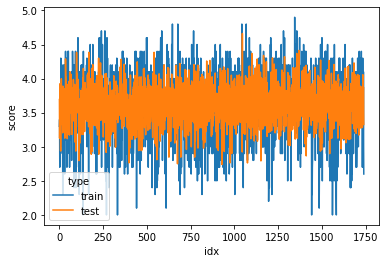

In [107]:
sns.lineplot(data=df_result, x="idx", y='score', hue="type")